In [38]:
# notebook: notebooks/exploration.ipynb
# Proje root: home-credit-project/

# Kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri yükleme
train = pd.read_csv("../data/raw/application_train.csv")
test = pd.read_csv("../data/raw/application_test.csv")

# Fonksiyon: Sayısal sütunları TARGET ile görselleştirme
def plot_numeric_distribution(df, column, target='TARGET'):
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=column, hue=target, multiple='stack', bins=30)
    plt.title(f'{column} distribution by {target}')
    plt.show()

# Fonksiyon: Eksik değerleri inceleme
def missing_values_table(df):
    missing_count = df.isnull().sum()
    missing_percent = 100 * missing_count / len(df)
    missing_df = pd.DataFrame({'missing_count': missing_count, 'missing_percent': missing_percent})
    missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    return missing_df

In [39]:
# Temel veri inceleme
print(train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [40]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [41]:
print(train.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [42]:
# TARGET dağılımı
print(train['TARGET'].value_counts(normalize=True))

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [ ]:
# Eksik değer tablosu
missing_df = missing_values_table(train)
print(missing_df.head(20))

# dropla sonra

                          missing_count  missing_percent
COMMONAREA_MEDI                  214865        69.872297
COMMONAREA_AVG                   214865        69.872297
COMMONAREA_MODE                  214865        69.872297
NONLIVINGAPARTMENTS_MEDI         213514        69.432963
NONLIVINGAPARTMENTS_MODE         213514        69.432963
NONLIVINGAPARTMENTS_AVG          213514        69.432963
FONDKAPREMONT_MODE               210295        68.386172
LIVINGAPARTMENTS_MODE            210199        68.354953
LIVINGAPARTMENTS_MEDI            210199        68.354953
LIVINGAPARTMENTS_AVG             210199        68.354953
FLOORSMIN_MODE                   208642        67.848630
FLOORSMIN_MEDI                   208642        67.848630
FLOORSMIN_AVG                    208642        67.848630
YEARS_BUILD_MODE                 204488        66.497784
YEARS_BUILD_MEDI                 204488        66.497784
YEARS_BUILD_AVG                  204488        66.497784
OWN_CAR_AGE                    

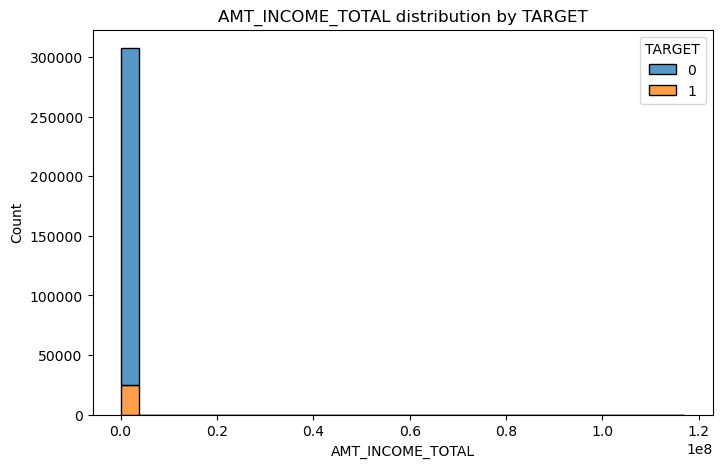

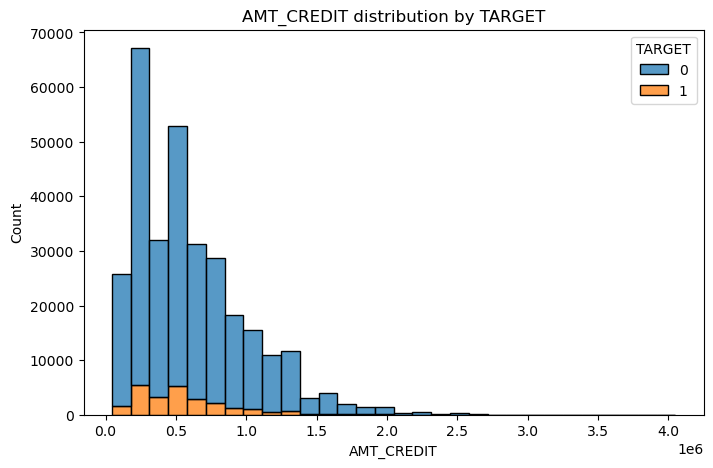

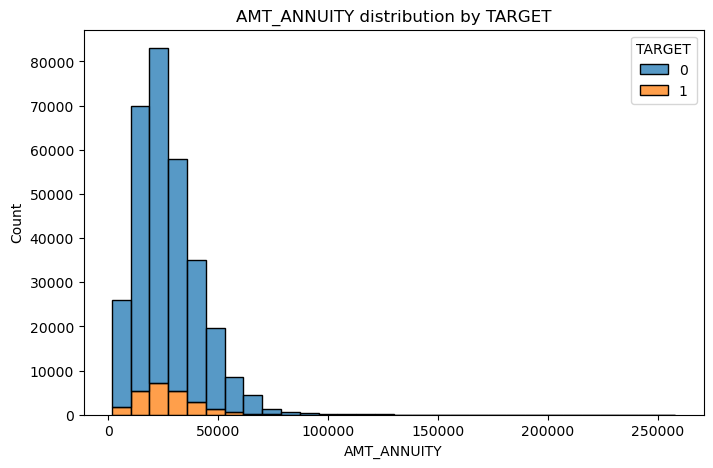

In [44]:
numeric_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for col in numeric_columns:
    plot_numeric_distribution(train, col)

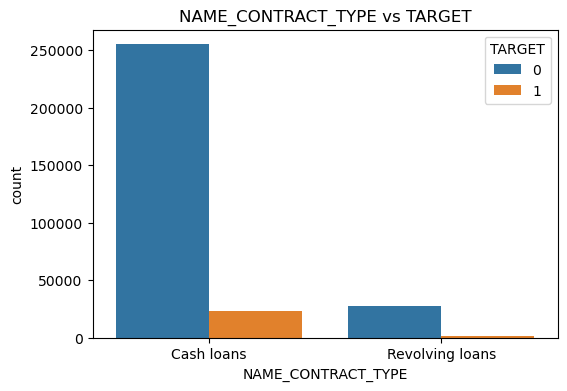

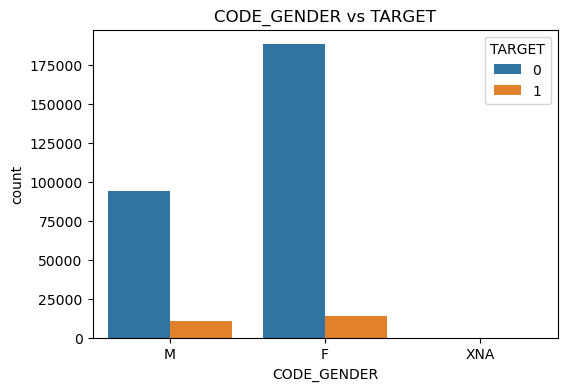

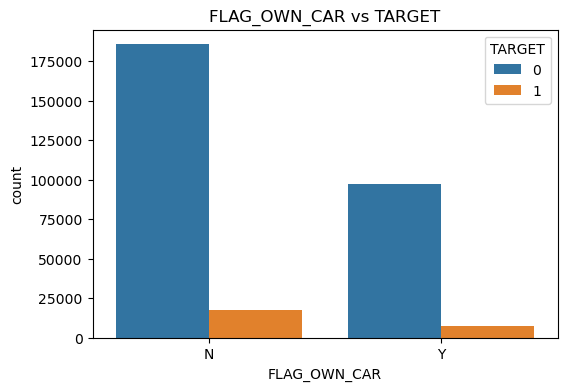

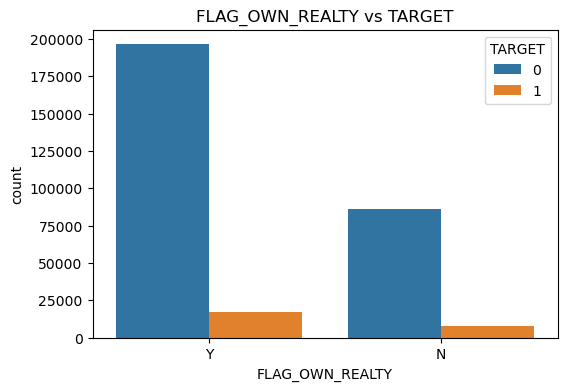

In [45]:
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, hue='TARGET')
    plt.title(f'{col} vs TARGET')
    plt.show()

In [46]:
high_missing_cols = missing_df[missing_df['missing_percent'] > 60].index.tolist()
medium_missing_cols = missing_df[(missing_df['missing_percent'] <= 60) & (missing_df['missing_percent'] > 10)].index.tolist()
low_missing_cols = missing_df[missing_df['missing_percent'] <= 10].index.tolist()

In [47]:
# Örnek uygulama

# 1. Drop high missing
train = train.drop(columns=high_missing_cols)
test  = test.drop(columns=high_missing_cols)

# 2. Median ile doldur (sayısal) ve mode ile doldur (kategorik)
for col in medium_missing_cols + low_missing_cols:
    if train[col].dtype in ['float64', 'int64']:
        median_val = train[col].median()
        train[col] = train[col].fillna(median_val)
        test[col]  = test[col].fillna(median_val)
    else:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)
        test[col]  = test[col].fillna(mode_val)


In [48]:
train.to_csv("../data/processed/train_clean.csv", index=False)
test.to_csv("../data/processed/test_clean.csv", index=False)